In [366]:
##pip install xgboost

In [367]:
import pandas as pd
import numpy as np
import statsmodels
import warnings
warnings.filterwarnings('ignore')

from xgboost import XGBRegressor


import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pickle

In [368]:
insurance_data = pd.read_csv("cleaned_dataset.csv")  # Replace with the actual file path


In [369]:
insurance_data.head()

,Unnamed: 0,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges,is_child,is_active,weight_status
0,0,55,female,36.41,0,yes,northeast,No history,No history,Never,Student,Basic,11896.836610,False,False,obese
1,1,64,female,20.12,2,no,northeast,High blood pressure,High blood pressure,Never,Blue collar,Basic,9563.655011,False,False,normal
2,2,40,female,44.93,2,yes,northeast,No history,Diabetes,Occasionally,Unemployed,Basic,14036.544130,False,True,obese
3,3,22,female,32.13,5,yes,northeast,Diabetes,No history,Never,Student,Basic,13669.577830,False,False,obese
4,4,64,female,29.31,2,no,northeast,High blood pressure,No history,Frequently,Unemployed,Basic,9414.800786,False,True,overweight


In [370]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250343 entries, 0 to 250342
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              250343 non-null  int64  
 1   age                     250343 non-null  int64  
 2   gender                  250343 non-null  object 
 3   bmi                     250343 non-null  float64
 4   children                250343 non-null  int64  
 5   smoker                  250343 non-null  object 
 6   region                  250343 non-null  object 
 7   medical_history         250343 non-null  object 
 8   family_medical_history  250343 non-null  object 
 9   exercise_frequency      250343 non-null  object 
 10  occupation              250343 non-null  object 
 11  coverage_level          250343 non-null  object 
 12  charges                 250343 non-null  float64
 13  is_child                250343 non-null  bool   
 14  is_active           

In [371]:
insurance_data.columns

Index(['Unnamed: 0', 'age', 'gender', 'bmi', 'children', 'smoker', 'region',
       'medical_history', 'family_medical_history', 'exercise_frequency',
       'occupation', 'coverage_level', 'charges', 'is_child', 'is_active',
       'weight_status'],
      dtype='object')

In [372]:
# Check for missing values
print(insurance_data.isnull().sum())

Unnamed: 0                0
age                       0
gender                    0
bmi                       0
children                  0
smoker                    0
region                    0
medical_history           0
family_medical_history    0
exercise_frequency        0
occupation                0
coverage_level            0
charges                   0
is_child                  0
is_active                 0
weight_status             0
dtype: int64


In [373]:
categorical_columns = ['gender', 'smoker', 'region', 'children', 'medical_history', 'family_medical_history', 'exercise_frequency',
       'occupation', 'is_child','coverage_level','weight_status', 'is_active']

for col in categorical_columns:
    insurance_data[col] = insurance_data[col].astype('category')

In [374]:
# One-hot encoding for categorical columns
insurance_data_encoded = pd.get_dummies(insurance_data, columns = categorical_columns, drop_first = True).astype(int)

In [375]:
insurance_data_encoded.head()

,Unnamed: 0,age,bmi,charges,gender_male,smoker_yes,children_1,children_2,children_3,children_4,...,exercise_frequency_Occasionally,exercise_frequency_Rarely,occupation_Student,occupation_Unemployed,occupation_White collar,coverage_level_Premium,coverage_level_Standard,weight_status_obese,weight_status_overweight,is_active_True
0,0,55,36,11896,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,1,64,20,9563,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,40,44,14036,0,1,0,1,0,0,...,1,0,0,1,0,0,0,1,0,1
3,3,22,32,13669,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,4,64,29,9414,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,1


In [376]:
 # Define numerical features to standardize (all non-categorical features)
#numerical_features = ["age", "bmi"]
#scaler = StandardScaler()
#insurance_data_encoded[numerical_features] = scaler.fit_transform(insurance_data_encoded[numerical_features])
    

In [377]:
insurance_data_encoded.head()

,Unnamed: 0,age,bmi,charges,gender_male,smoker_yes,children_1,children_2,children_3,children_4,...,exercise_frequency_Occasionally,exercise_frequency_Rarely,occupation_Student,occupation_Unemployed,occupation_White collar,coverage_level_Premium,coverage_level_Standard,weight_status_obese,weight_status_overweight,is_active_True
0,0,55,36,11896,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,1,64,20,9563,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,40,44,14036,0,1,0,1,0,0,...,1,0,0,1,0,0,0,1,0,1
3,3,22,32,13669,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,4,64,29,9414,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,1


# Splitting the Dataset in to training & testing

In [378]:
X = insurance_data_encoded.drop(['charges'], axis=1)
y = insurance_data_encoded['charges']

In [379]:
correlation_matrix = pd.concat((y,X),axis=1).corr()


In [380]:
##correlation_matrix.to_excel('correlation.xlsx')

In [381]:
correlation_matrix

,charges,Unnamed: 0,age,bmi,gender_male,smoker_yes,children_1,children_2,children_3,children_4,...,exercise_frequency_Occasionally,exercise_frequency_Rarely,occupation_Student,occupation_Unemployed,occupation_White collar,coverage_level_Premium,coverage_level_Standard,weight_status_obese,weight_status_overweight,is_active_True
charges,1.000000,0.001185,0.066001,0.102914,0.111777,0.567483,-0.031421,-0.013097,0.012335,0.031833,...,1.737356e-02,-0.050423,-0.065222,-0.132552,0.129751,0.426794,-0.052078,0.084188,-0.029254,0.142206
Unnamed: 0,0.001185,1.000000,-0.000189,0.001272,0.000126,-0.003298,0.001496,0.001409,-0.001310,-0.000497,...,-2.240201e-03,0.004085,-0.002132,-0.000565,0.004074,0.002056,-0.000083,0.000103,0.000413,-0.001282
age,0.066001,-0.000189,1.000000,-0.000519,-0.001043,0.000609,0.000189,-0.000473,-0.002787,0.001294,...,1.104446e-03,0.001088,-0.000265,0.000631,0.000336,0.002470,0.001332,-0.001064,0.001811,-0.001709
bmi,0.102914,0.001272,-0.000519,1.000000,-0.001354,-0.000057,-0.001328,0.001399,-0.000189,-0.000499,...,2.241824e-03,0.004631,-0.000166,0.001760,-0.000120,0.000725,-0.000929,0.838577,-0.302368,-0.002388
gender_male,0.111777,0.000126,-0.001043,-0.001354,1.000000,-0.002689,0.001831,-0.000854,-0.001382,0.000689,...,-1.032512e-03,-0.001505,-0.001369,-0.000444,0.000376,-0.000023,0.000529,-0.001103,-0.000624,0.000788
smoker_yes,0.567483,-0.003298,0.000609,-0.000057,-0.002689,1.000000,0.000088,-0.001273,0.001713,0.000327,...,2.572096e-03,-0.004408,-0.000825,-0.001281,-0.001279,-0.003336,0.002305,0.000371,-0.001977,0.002390
children_1,-0.031421,0.001496,0.000189,-0.001328,0.001831,0.000088,1.000000,-0.201149,-0.200535,-0.199966,...,-3.493308e-03,-0.001036,-0.000279,0.001500,-0.001525,0.000678,0.001781,-0.001002,0.001300,-0.000085
children_2,-0.013097,0.001409,-0.000473,0.001399,-0.000854,-0.001273,-0.201149,1.000000,-0.200256,-0.199688,...,-7.978545e-04,-0.001993,-0.001362,-0.000294,0.003475,-0.001268,-0.000067,0.002417,-0.000848,-0.001805
children_3,0.012335,-0.001310,-0.002787,-0.000189,-0.001382,0.001713,-0.200535,-0.200256,1.000000,-0.199078,...,3.392056e-03,0.000759,0.000795,0.000730,0.000585,0.002209,-0.001832,0.000631,-0.001493,0.000633
children_4,0.031833,-0.000497,0.001294,-0.000499,0.000689,0.000327,-0.199966,-0.199688,-0.199078,1.000000,...,-5.512546e-04,-0.000050,0.000578,0.000815,0.000713,0.002364,-0.002156,-0.001517,-0.000083,0.000222


<Axes: >

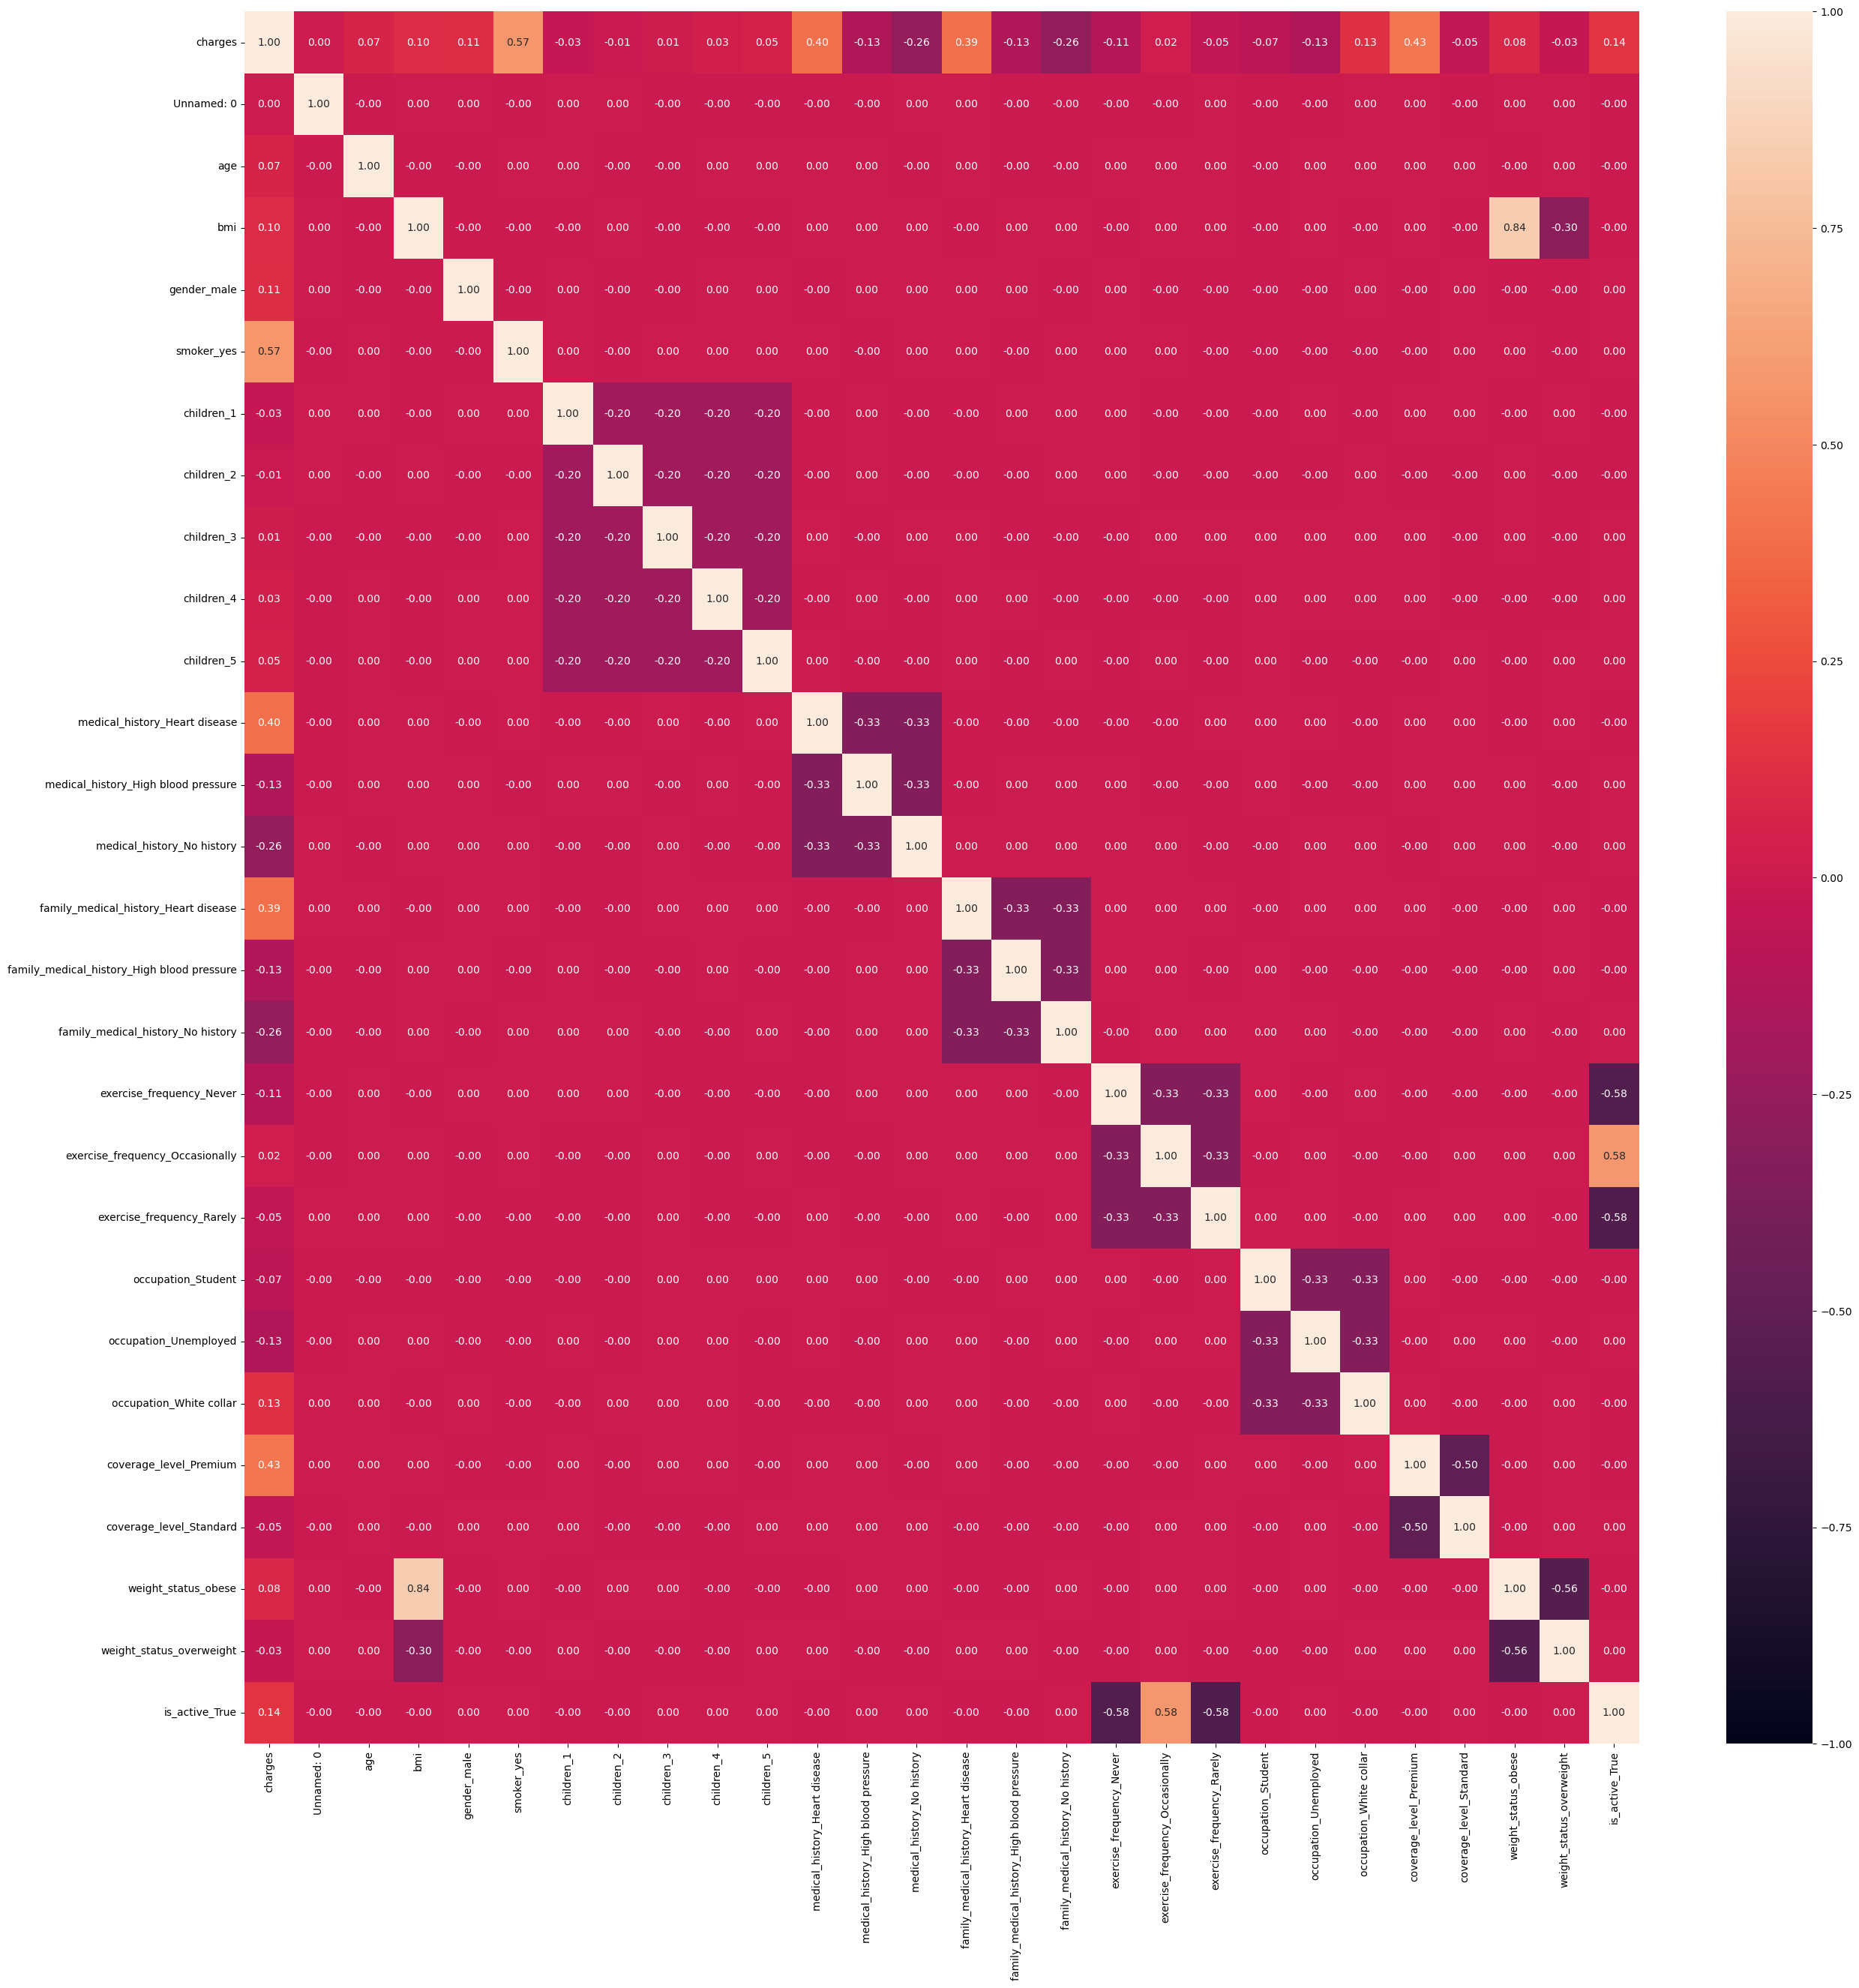

In [382]:
plt.figure(figsize = (30,30))
sns.heatmap(correlation_matrix,vmax=1,vmin=-1,annot=True,fmt=".2f")

More correlated independent variables
- weight_status_obese & bmi
- is_active_True & exercise_frequency_Never
- exercise_frequency_Rarely & is_active_True



In [383]:
# Compute VIF for each feature
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)
    return vif_data

In [384]:
# Exclude target variable if present
vif_result = calculate_vif(X)

In [385]:
vif_result

,Feature,VIF
0,is_active_True,28.777385
1,exercise_frequency_Rarely,14.381775
2,exercise_frequency_Never,14.254334
3,weight_status_obese,5.089181
4,bmi,3.873396
5,children_1,1.672689
6,children_2,1.671513
7,children_5,1.670548
8,children_3,1.668897
9,children_4,1.666529


Remove:
- is_active_True
- exercise_frequency_Rarely

To check if the features are significant or not

In [386]:
# Add a constant term for the intercept
X = sm.add_constant(X)

In [387]:
# Fit the linear regression model
model = sm.OLS(y, X).fit()

In [388]:
# Get the p-values for each feature
p_values = model.pvalues


In [389]:
# Create a DataFrame for significance results
significance = pd.DataFrame({'Feature': p_values.index, 'P-Value': p_values.values})

In [390]:
significance

,Feature,P-Value
0,const,0.000000
1,Unnamed: 0,0.095983
2,age,0.000000
3,bmi,0.000000
4,gender_male,0.000000
5,smoker_yes,0.000000
6,children_1,0.000000
7,children_2,0.000000
8,children_3,0.000000
9,children_4,0.000000


In [391]:
# Mark features as significant or not based on p-value threshold (0.05)
significance['Significant'] = significance['P-Value'] < 0.05

In [392]:
# Display the significance table
print(significance)

                                       Feature   P-Value  Significant
0                                        const  0.000000         True
1                                   Unnamed: 0  0.095983        False
2                                          age  0.000000         True
3                                          bmi  0.000000         True
4                                  gender_male  0.000000         True
5                                   smoker_yes  0.000000         True
6                                   children_1  0.000000         True
7                                   children_2  0.000000         True
8                                   children_3  0.000000         True
9                                   children_4  0.000000         True
10                                  children_5  0.000000         True
11               medical_history_Heart disease  0.000000         True
12         medical_history_High blood pressure  0.000000         True
13                  

Remove columns that are not significant:
   - weight_status_obese
   - weight_status_overweight

As per above analysis, will remove:
- weight_status_obese
- weight_status_overweight
- is_active_True
- exercise_frequency_Rarely
- weight_status_obese


In [393]:
X = insurance_data_encoded.drop(['charges', 'Unnamed: 0',
                                 'weight_status_obese', 
                                 'weight_status_overweight', 
                                 'is_active_True', 
                                 'exercise_frequency_Rarely'], axis=1)

In [394]:
X.columns

Index(['age', 'bmi', 'gender_male', 'smoker_yes', 'children_1', 'children_2',
       'children_3', 'children_4', 'children_5',
       'medical_history_Heart disease', 'medical_history_High blood pressure',
       'medical_history_No history', 'family_medical_history_Heart disease',
       'family_medical_history_High blood pressure',
       'family_medical_history_No history', 'exercise_frequency_Never',
       'exercise_frequency_Occasionally', 'occupation_Student',
       'occupation_Unemployed', 'occupation_White collar',
       'coverage_level_Premium', 'coverage_level_Standard'],
      dtype='object')

In [395]:
y.head()

0    11896
1     9563
2    14036
3    13669
4     9414
Name: charges, dtype: int32

In [396]:
# Splitting the dataset for training and testing the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [397]:
X_train.head()

,age,bmi,gender_male,smoker_yes,children_1,children_2,children_3,children_4,children_5,medical_history_Heart disease,...,family_medical_history_Heart disease,family_medical_history_High blood pressure,family_medical_history_No history,exercise_frequency_Never,exercise_frequency_Occasionally,occupation_Student,occupation_Unemployed,occupation_White collar,coverage_level_Premium,coverage_level_Standard
76495,56,26,1,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
59504,22,24,1,1,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
235364,62,40,1,1,0,0,0,0,1,0,...,1,0,0,0,1,0,0,1,0,1
160317,26,26,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0
194967,23,40,1,1,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,1


# Data Modeling:

# Linear Regression

In [398]:
# Train the model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)


LinearRegression()

In [399]:
# Get feature importance (absolute coefficient values)
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': linear_reg.coef_,
    'Absolute_Coefficient': np.abs(linear_reg.coef_)
})

In [400]:
# Sort by absolute coefficient value in descending order
feature_importance = feature_importance.sort_values(by="Absolute_Coefficient", ascending=False)

In [401]:
# Display feature importance
print(feature_importance)

                                       Feature  Coefficient  \
3                                   smoker_yes  5005.550588   
20                      coverage_level_Premium  4998.229534   
9                medical_history_Heart disease  3000.323415   
12        family_medical_history_Heart disease  2997.492285   
14           family_medical_history_No history -2003.199136   
21                     coverage_level_Standard  2001.247215   
11                  medical_history_No history -1996.391367   
18                       occupation_Unemployed -1502.526144   
15                    exercise_frequency_Never -1256.096629   
8                                   children_5  1008.438214   
17                          occupation_Student -1001.932655   
13  family_medical_history_High blood pressure -1001.400802   
2                                  gender_male   998.558924   
10         medical_history_High blood pressure  -996.663358   
7                                   children_4   801.39

In [402]:
# Predict
y_pred = linear_reg.predict(X_test)

In [403]:
# Evaluation metrics
linear_reg_mse_train = mean_squared_error(y_train, y_train_pred)
linear_reg_rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
linear_reg_r2_score_train = r2_score(y_train, y_train_pred)

linear_reg_mse_test = mean_squared_error(y_test, y_test_pred)
linear_reg_rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
linear_reg_r2_score_test = r2_score(y_test, y_test_pred)

In [404]:
print("\nTraining Performance:")
print(f"Mean Squared Error: {linear_reg_mse_train}")
print(f"Root Mean Squared Error: {linear_reg_rmse_train}")
print(f"R² Score (Train Accuracy): {linear_reg_r2_score_train}")

print("\nTesting Performance:")
print(f"Mean Squared Error: {linear_reg_mse_test}")
print(f"Root Mean Squared Error: {linear_reg_rmse_test}")
print(f"R² Score (Test Accuracy): {linear_reg_r2_score_test}")


Training Performance:
Mean Squared Error: 71703.55609963591
Root Mean Squared Error: 267.7751969463115
R² Score (Train Accuracy): 0.9963052143321969

Testing Performance:
Mean Squared Error: 504832.94376255036
Root Mean Squared Error: 710.5159700967673
R² Score (Test Accuracy): 0.9740687697417384


# Decision tree


In [405]:
# Train Decision Tree Model
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [406]:
# Predictions
y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)

In [407]:
# Evaluate the model
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

In [408]:
# Print evaluation results
print(f"Train R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")
print(f"Test Mean Squared Error (MSE): {test_mse:.4f}")
print(f"Test Root Mean Squared Error (RMSE): {test_rmse:.4f}")


Train R² Score: 0.9999
Test R² Score: 0.9539
Test Mean Squared Error (MSE): 898039.0836
Test Root Mean Squared Error (RMSE): 947.6492


# Random Forest

In [409]:
# Train Random Forest Model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [410]:
# Predictions
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

In [411]:
# Evaluate the model
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

In [412]:
# Print evaluation results
print(f"Train R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")
print(f"Train Mean Squared Error (MSE): {train_mse:.4f}")
print(f"Test Mean Squared Error (MSE): {test_mse:.4f}")
print(f"Train Root Mean Squared Error (RMSE): {train_rmse:.4f}")
print(f"Test Root Mean Squared Error (RMSE): {test_rmse:.4f}")


Train R² Score: 0.9963
Test R² Score: 0.9741
Train Mean Squared Error (MSE): 71731.0382
Test Mean Squared Error (MSE): 504730.5296
Train Root Mean Squared Error (RMSE): 267.8265
Test Root Mean Squared Error (RMSE): 710.4439


# XGBoost Model

In [413]:
## XGBoost Model
xgboost_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgboost_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [414]:
# Predictions
y_train_xgb_pred = xgboost_model.predict(X_train)
y_test_xgb_pred = xgboost_model.predict(X_test)

In [415]:
# Evaluate XGBoost Model
train_r2_xgb = r2_score(y_train, y_train_xgb_pred)
test_r2_xgb = r2_score(y_test, y_test_xgb_pred)
train_mse_xgb = mean_squared_error(y_train, y_train_xgb_pred)
test_mse_xgb = mean_squared_error(y_test, y_test_xgb_pred)


In [416]:
print("\n🔵 XGBOOST RESULTS:")
print(f"Train R² Score: {train_r2_xgb:.4f}")
print(f"Test R² Score: {test_r2_xgb:.4f}")
print(f"Train Mean Squared Error (MSE): {train_mse_xgb:.4f}")
print(f"Test Mean Squared Error (MSE): {test_mse_xgb:.4f}")


🔵 XGBOOST RESULTS:
Train R² Score: 0.9810
Test R² Score: 0.9803
Train Mean Squared Error (MSE): 368504.9044
Test Mean Squared Error (MSE): 382871.4665


# Gradient Boosting Regression

In [417]:
### 🟠 Gradient Boosting Model
gbr_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=4, random_state=42)
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=200,
                          random_state=42)

In [418]:
# Predictions
y_train_gbr_pred = gbr_model.predict(X_train)
y_test_gbr_pred = gbr_model.predict(X_test)

In [419]:
# Evaluate Gradient Boosting Model
train_r2_gbr = r2_score(y_train, y_train_gbr_pred)
test_r2_gbr = r2_score(y_test, y_test_gbr_pred)
train_mse_gbr = mean_squared_error(y_train, y_train_gbr_pred)
test_mse_gbr = mean_squared_error(y_test, y_test_gbr_pred)

In [420]:
# Print evaluation results
print("\n🟠 GRADIENT BOOSTING RESULTS:")
print(f"Train R² Score: {train_r2_gbr:.4f}")
print(f"Test R² Score: {test_r2_gbr:.4f}")
print(f"Train Mean Squared Error (MSE): {train_mse_gbr:.4f}")
print(f"Test Mean Squared Error (MSE): {test_mse_gbr:.4f}")


🟠 GRADIENT BOOSTING RESULTS:
Train R² Score: 0.9783
Test R² Score: 0.9781
Train Mean Squared Error (MSE): 420310.1328
Test Mean Squared Error (MSE): 426062.6618


Results:Linear Regression Test Accuracy: 97.42%
Linear Regression Train Accuracy: 99.63%

Decision Tree Test Accuracy: 95.20%
Decision Tree Train Accuracy: 100%

Random Forest Test Accuracy: 99.64%
Random Forest Train Accuracy: 97.42%

XGBoost Model Test Accuracy: 98.03%
XGBoost Model Train Accuracy: 98.10%

Gradient Boosting Test Accuracy: 97.81%
Gradient Boosting Train Accuracy: 97.83%

In [421]:
X_train.columns


Index(['age', 'bmi', 'gender_male', 'smoker_yes', 'children_1', 'children_2',
       'children_3', 'children_4', 'children_5',
       'medical_history_Heart disease', 'medical_history_High blood pressure',
       'medical_history_No history', 'family_medical_history_Heart disease',
       'family_medical_history_High blood pressure',
       'family_medical_history_No history', 'exercise_frequency_Never',
       'exercise_frequency_Occasionally', 'occupation_Student',
       'occupation_Unemployed', 'occupation_White collar',
       'coverage_level_Premium', 'coverage_level_Standard'],
      dtype='object')

# Data Prediction

In [426]:
def predict_insurance_charges(gbr_model, X_train_columns, categorical_columns):
    # Define input data (replace with real user input from a form)
    input_data = {
        'age': 45,
        'bmi': 29.3,
        'gender': 'male', 
        'smoker': 'yes',
        'region': 'northeast',
        'children': 2,
        'medical_history': 'No history' , 
        'family_medical_history':'No history' , 
        'exercise_frequency': 'Never', 
        'occupation': 'Student', 
        'is_child': 'False', 
        'coverage_level': 'Basic', 
        'weight_status': 'normal', 
        'is_active': 'False'
    }

    # Convert input data to DataFrame
    input_data_df = pd.DataFrame([input_data])

    # One-hot encode categorical columns
    input_data_encoded = pd.get_dummies(input_data_df, columns=categorical_columns)

    # Add missing columns from training data and ensure correct order
    missing_cols = set(X_train_columns) - set(input_data_encoded.columns)
    for col in missing_cols:
        input_data_encoded[col] = 0
    input_data_encoded = input_data_encoded[X_train_columns]

    # Predict insurance charges
    predicted_charges = gbr_model.predict(input_data_encoded)
    
    return predicted_charges[0]




In [427]:
# Call the function
predicted_value = predict_insurance_charges(gbr_model, X.columns, categorical_columns)
print(f"Predicted Insurance Charges: ${predicted_value:.2f}")

Predicted Insurance Charges: $12532.65
